In [35]:
#Import the data.
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Earthquake = pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/2015-03-earthquake-maps/master/data/earthquake_states.csv")
Earthquake.head()
Earthquake = Earthquake.dropna()
Earthquake=Earthquake.drop(['id','updated','type','geom'],axis=1)
Earthquake.sort_values(['mag'],axis = 0, ascending=True,inplace=True)
Earthquake.head()

,time,latitude,longitude,mag,place,state
105552,1978-06-14 19:44:33.4-04,33.500,-116.782,3.0,Southern California,California
61125,1998-01-26 06:00:53.63-05,37.037,-121.489,3.0,Northern California,California
61127,1998-01-26 04:32:31.87-05,62.220,-150.274,3.0,Central Alaska,Alaska
96756,1984-10-03 19:17:23.08-04,62.742,-143.714,3.0,Central Alaska,Alaska
23664,2008-11-08 11:31:54-05,33.498,-116.513,3.0,Southern California,California


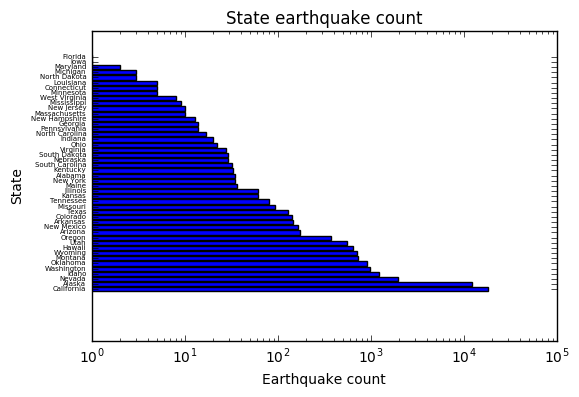

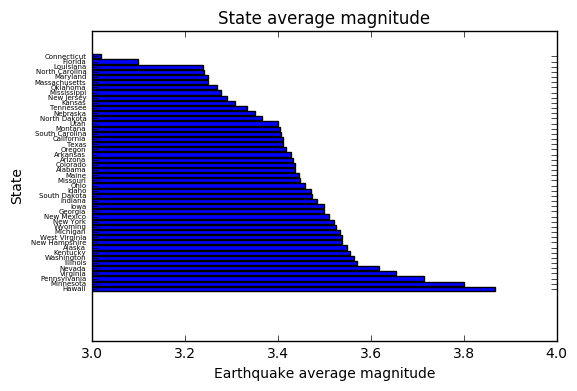

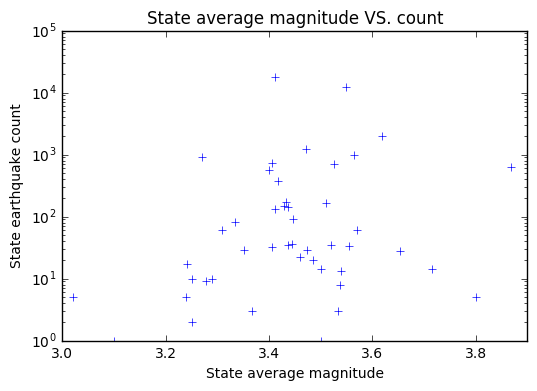

In [36]:
#Step2, analize the counts of earthquakes in different states.
Statecount = Earthquake.groupby(['state']).size().to_frame('count').reset_index()
Statecount.sort_values(['count'],axis=0,ascending=False,inplace=True)
stateaver = Earthquake[['state','mag']].groupby(['state']).mean().reset_index()
stateaver.columns=['state','avermag']
stateaver.sort_values(['avermag'],ascending=False,inplace=True)
state=pd.merge(Statecount, stateaver, on='state', how='inner')
state.sort_values(['count'],ascending=False, inplace=True)
plt.title('State earthquake count')
plt.barh(range(0,len(state)), state['count'], align='center')
plt.yticks(range(0,len(state)),state['state'], size=5)
plt.ylabel('State')
plt.xlabel('Earthquake count')
plt.xscale('log')
plt.show()
state.sort_values(['avermag'],ascending=False, inplace=True)
plt.title('State average magnitude')
plt.barh( range(0,len(state)), state['avermag'], align='center')
plt.yticks(range(0,len(state)),state['state'], size=5)
plt.ylabel('State')
plt.xlabel('Earthquake average magnitude')
plt.xlim([3, 4])
plt.show()
plt.plot(state['avermag'],state['count'],'+')
plt.yscale('log')
plt.title('State average magnitude VS. count')
plt.xlabel('State average magnitude')
plt.ylabel('State earthquake count')
plt.show()

With these plots, we can say that there is no obvious relation between a state's average magnitude and its earthquake count. California
has the most earthquakes in US, and Hawaii has the highest state average magnitude in US. It is not very practical to compare these two
factors and figure out which one is more important for people to watch out, so I invent a new variable called total magnitude, which is 
calculated by summing up all the magnitudes of earthquakes together, and it can also be calculated by State average magnitude times state
earthquake count.

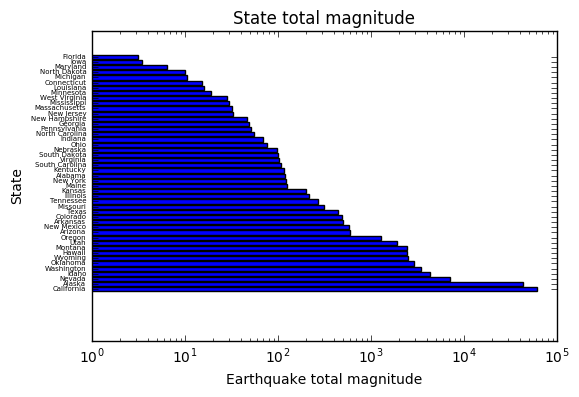

In [37]:
state['totalmag']=state['avermag']*state['count']
state.sort_values(['totalmag'],ascending=False, inplace=True)
plt.title('State total magnitude')
plt.barh( range(0,len(state)), state['totalmag'], align='center')
plt.yticks(range(0,len(state)),state['state'], size=5)
plt.ylabel('State')
plt.xlabel('Earthquake total magnitude')
plt.xscale('log')
plt.show()

We can see that the result of this new variable is pretty close to the result of state earthquake count. And this is reasonable because the average magnitudes of all these states are all in the range of 3 to 4, so the influence of state average magnitude on this total magnitude is really limited.

   cate  count
0     3  33888
1     4   5472
2     5    578
3     6     52
4     7     10


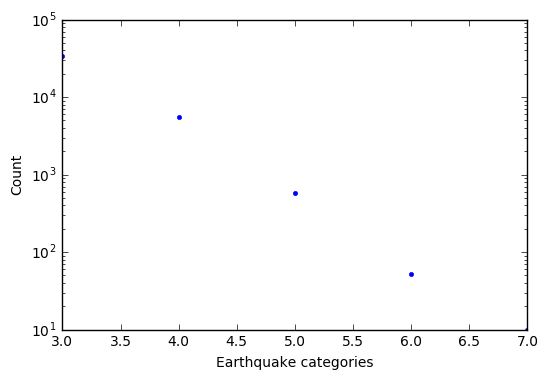

In [38]:
Earthquake['cate']=Earthquake['mag'].apply(int)
catecount=Earthquake[['cate']].groupby(['cate']).size().to_frame('count').reset_index()
print(catecount)
plt.plot(catecount['cate'],catecount['count'],'.')
plt.xlabel('Earthquake categories')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

It seems that there is a linear relation between earthquake category and the denary logarithm of its count. So let's see how well it works.

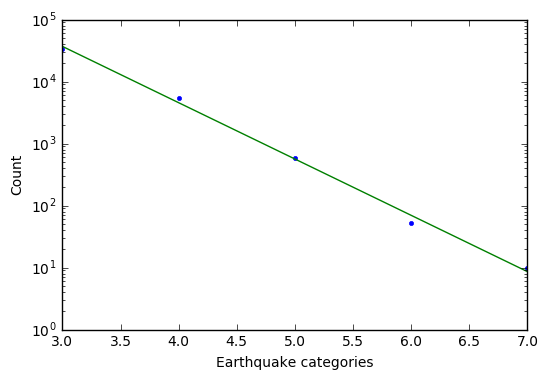

p-value: 8.39796919507e-05
r-value: -0.99830188389


In [39]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(catecount['cate'], catecount['count'].apply(np.log10))
plt.plot(catecount['cate'],catecount['count'],'.')
plt.plot(catecount['cate'],np.power(10,slope*catecount['cate']+intercept),'-')
plt.xlabel('Earthquake categories')
plt.ylabel('Count')
plt.yscale('log')
plt.show()
print('p-value: '+str(p_value))
print('r-value: '+str(r_value))

Since the p-value is much smaller than 0.001, and the absolute value of r-value is very close to 1, we can figure out that there is a clear linear relation between the earthquake categories and the denary logarithm of their counts.

In [40]:
Earthquake[['date','dtime']] = Earthquake['time'].str.split(' ',1,expand=True)
Earthquake[['year','month','day']] = Earthquake['date'].str.split('-',2,expand=True)
yearaver = Earthquake[['year','mag']].groupby(['year']).mean().reset_index()
yearaver.sort_values(['mag'],ascending=True,inplace=True)
monthaver = Earthquake[['month','mag']].groupby(['month']).mean().reset_index()
monthaver.sort_values(['mag'],ascending=True,inplace=True)
Earthquake.sort_values(['mag'],axis = 0, ascending=False,inplace=True)
Earthquake.head()

,time,latitude,longitude,mag,place,state,cate,date,dtime,year,month,day
47447,2002-11-03 22:12:41-05,63.517,-147.444,7.9,Central Alaska,Alaska,7,2002-11-03,22:12:41-05,2002,11,03
84839,1992-06-28 11:57:34.12-04,34.201,-116.436,7.3,Southern California,California,7,1992-06-28,11:57:34.12-04,1992,06,28
74154,1992-06-28 11:57:34.12-04,34.201,-116.436,7.3,Southern California,California,7,1992-06-28,11:57:34.12-04,1992,06,28
89261,1989-10-18 00:04:15.24-04,37.036,-121.883,7.2,Northern California,California,7,1989-10-18,00:04:15.24-04,1989,10,18
74638,1992-04-25 18:06:04.21-04,40.368,-124.316,7.2,Northern California,California,7,1992-04-25,18:06:04.21-04,1992,04,25


In [41]:
map = folium.Map(location=[47, -130], zoom_start=3)
BigEarthquake = Earthquake[Earthquake['mag']>=5]
for i, row in BigEarthquake.iterrows():
    if row['mag'] < 6:
        folium.CircleMarker([row['latitude'], row['longitude']],radius=row['mag']/3,popup='Magnitude: '+str(row['mag'])+' Place: '+row['place']+' Time: '+str(row['time']),color='yellow',fill_color='yellow').add_to(map)
    elif row['mag'] < 7:
        folium.CircleMarker([row['latitude'], row['longitude']],radius=row['mag']/2,popup='Magnitude: '+str(row['mag'])+' Place: '+row['place']+' Time: '+str(row['time']),color='red',fill_color='red').add_to(map)
    elif row['mag'] < 8:
        folium.CircleMarker([row['latitude'], row['longitude']],radius=row['mag'],popup='Magnitude: '+str(row['mag'])+' Place: '+row['place']+' Time: '+str(row['time']),color='black',fill_color='black').add_to(map)
map

In [42]:
stateyearcount = Earthquake[['year','state']].groupby(['year','state']).size().to_frame('count').reset_index()
stateyearcount.sort_values(['count'],axis = 0, ascending=False,inplace=True)
moststateyear=stateyearcount.iloc[0]
print('the highest count of Earthquake of one state in a year: ')
print(str(moststateyear['count'])+' times, in '+str(moststateyear['state'])+', in '+str(moststateyear['year']))

the highest count of Earthquake of one state in a year: 
2426 times, in California, in 1992


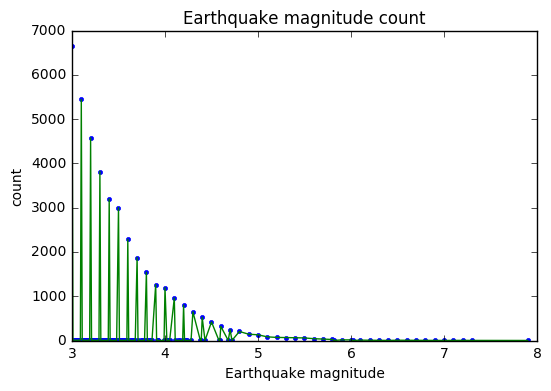

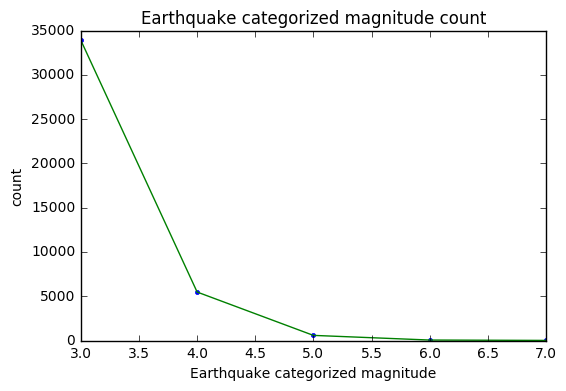

In [43]:
magcount = Earthquake[['mag']].groupby(['mag']).size().to_frame('count').reset_index()
plt.title('Earthquake magnitude count')
plt.plot(magcount['mag'],magcount['count'],'.')
plt.plot(magcount['mag'],magcount['count'],'-')
plt.xlabel('Earthquake magnitude')
plt.ylabel('count')
plt.show()
catecount = Earthquake[['cate']].groupby(['cate']).size().to_frame('count').reset_index()
plt.title('Earthquake categorized magnitude count')
plt.plot(catecount['cate'],catecount['count'],'.')
plt.plot(catecount['cate'],catecount['count'],'-')
plt.xlabel('Earthquake categorized magnitude')
plt.ylabel('count')
plt.show()

Looking at the raw data, we can easily figure out the raw data is really abnormal. When the magnitude is less than 5,
the occurence of earthquakes with a magnitude of a multiple of 0.1 is significantly higher than the occurence of earthquakes with other magnitudes. So, the data cannot show a real distribution of earthquake magnitudes in US.
Then what should I do to reveal the true distribution?
There are two possible ideas, one is to split some of the sharp peaks to their neighboring ranges, so that we may lower those peaks and get
a more smooth line. I can split those peaks with normal distribution into its neighboring range with a length of 1, or I can split it evenly
in that range. But this may bring more uncertainties into the dataset, and uncertainties are not good for data analysis.
Another way is to round the magnitudes to 0.1 level, so that we can ignore those special cases, and look at the big picture of the data.
Compared with the previous idea, this one is much easier, all I need to do is round up the maginitudes. 

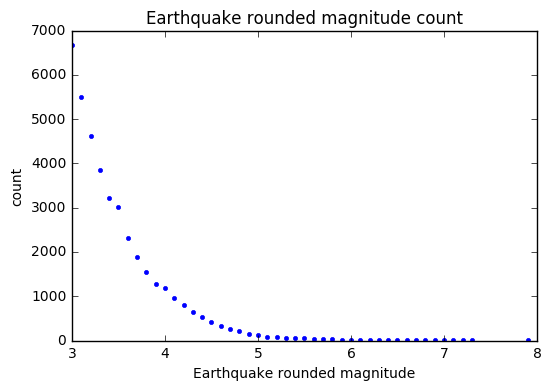

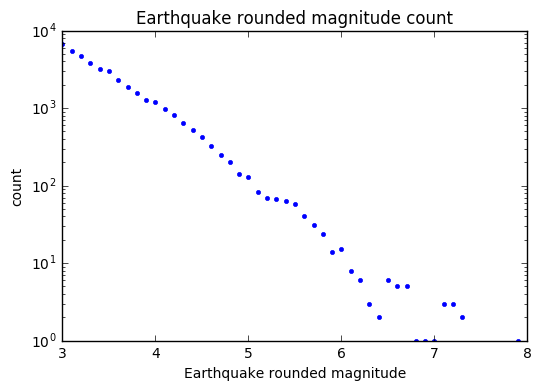

In [44]:
magcount['roundmag']=round(magcount['mag'],1)
roundcount = magcount[['roundmag','count']].groupby(['roundmag']).sum().reset_index()
plt.title('Earthquake rounded magnitude count')
plt.plot(roundcount['roundmag'],roundcount['count'],'.')
plt.xlabel('Earthquake rounded magnitude')
plt.ylabel('count')
plt.show()
plt.title('Earthquake rounded magnitude count')
plt.plot(roundcount['roundmag'],roundcount['count'],'.')
plt.xlabel('Earthquake rounded magnitude')
plt.ylabel('count')
plt.yscale('log')
plt.show()

We can see that the Earthquake rounded magnitude count plot shows the same idea that the logarithm of count may have a linear relation with Earthquake magnitude (rounded), just as the relation between count and earthquake categories. So we may get a linear relation on this one as well.

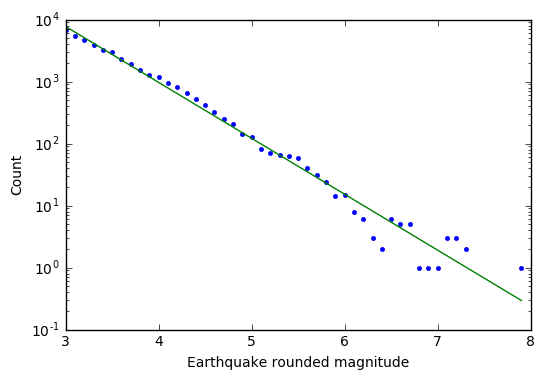

p-value: 1.35188447099e-35
r-value: -0.986742851642


In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(roundcount['roundmag'], roundcount['count'].apply(np.log10))
plt.plot(roundcount['roundmag'],roundcount['count'],'.')
plt.plot(roundcount['roundmag'],np.power(10,slope*roundcount['roundmag']+intercept),'-')
plt.xlabel('Earthquake rounded magnitude')
plt.ylabel('Count')
plt.yscale('log')
plt.show()
print('p-value: '+str(p_value))
print('r-value: '+str(r_value))

This linear model also shows pretty good fitness from its p-value and r-value, so we can say that this is a good fit. Because the count of earthquake cannot be negative, so we should check whether this model is still valid when it reaches to some very very rare earthquake catastrophe. Because this model is on the logarithm of count, when the rounded magnitude keeps increasing, the regression line can only get closer and closer to count=0, but never reach it. So this linear model is a qualified model. And we can also see the real shape of this regression model with a uniform cordinate system.

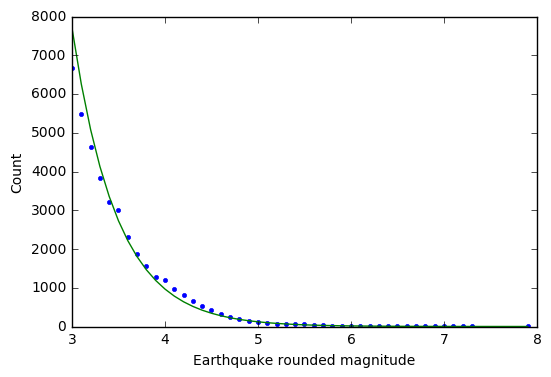

In [46]:
plt.plot(roundcount['roundmag'],roundcount['count'],'.')
plt.plot(roundcount['roundmag'],np.power(10,slope*roundcount['roundmag']+intercept),'-')
plt.xlabel('Earthquake rounded magnitude')
plt.ylabel('Count')
plt.show()

For earthquake researchers, there is another interesting topic that they desire to figure out, which is the period of earthquakes. A more professional way to call it is "the seismic cycle", which includes three parts, inter-seismic slip, co-seismic slip, and post-seismic slip. In the first part, the strain accumulates steadily between the earthquakes; then, the second part refers to the slip that occurs at the instant of the earthquake; after that, the third part refers to slip that occurs after an earthquake. With enough data, we can group the data into certain areas and show the change of the strain.

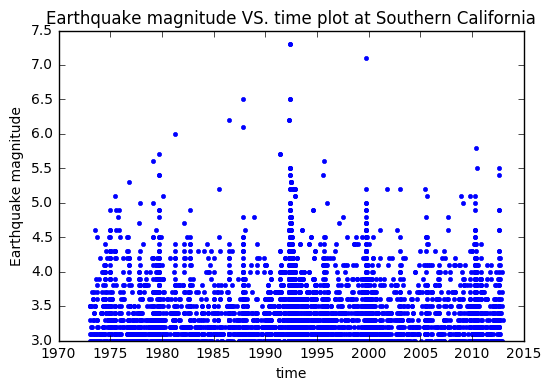

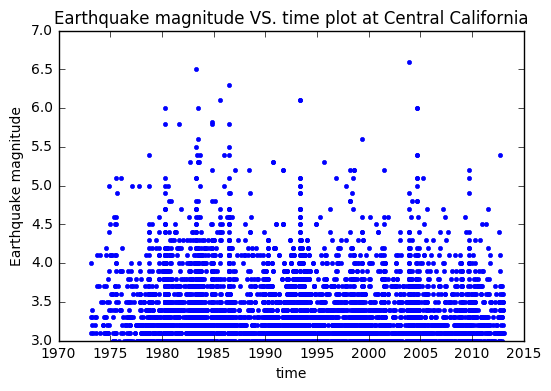

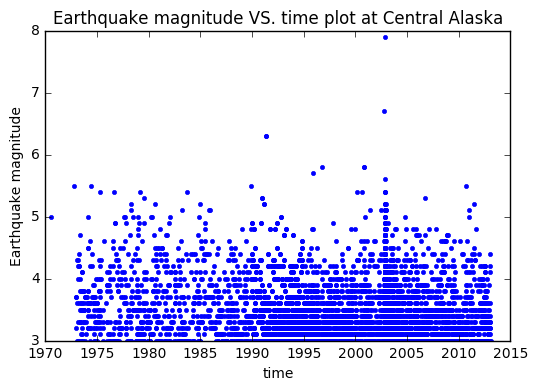

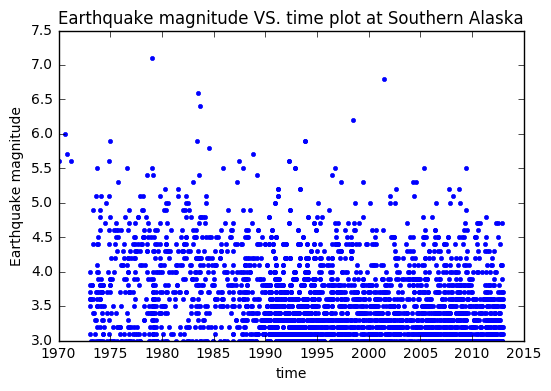

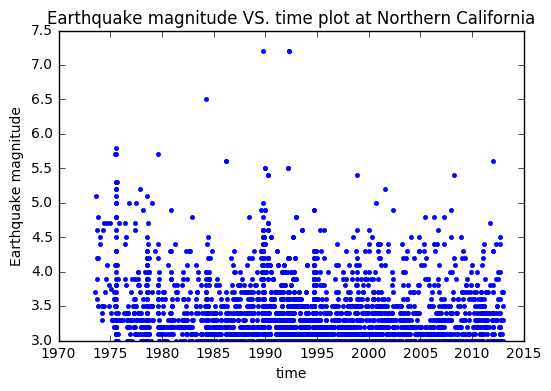

In [65]:
Hotzone={}
Areacount=pd.DataFrame()
Areacount = Earthquake[['place']].groupby(['place']).size().to_frame('count').reset_index()
Areacount.sort_values(['count'], ascending=False, inplace=True)
Toparea=Areacount.head()
for place in Toparea['place']:
    Hotzone[place]=Earthquake[Earthquake['place']==place].filter(['mag','year','month'],axis=1)
    temp=Hotzone[place]
    plt.title('Earthquake magnitude VS. time plot at '+place)
    plt.plot(temp['year'].apply(int)+(temp['month'].apply(int)-1)/12,temp['mag'],'.')
    plt.xlabel('time')
    plt.ylabel('Earthquake magnitude')
    plt.show()